In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

In [3]:
train_df = pd.read_csv('train.csv')
train_df.head()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


<Axes: xlabel='Heart Disease', ylabel='count'>

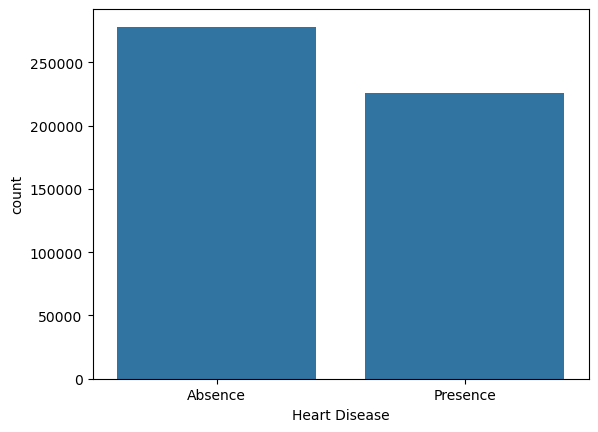

In [79]:
sns.countplot(data = train_df, x = 'Heart Disease')

In [4]:
train_df.describe()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,54.136706,0.714735,3.312752,130.497433,245.011814,0.079987,0.981660,152.816763,0.273725,0.716028,1.455871,0.451040,4.618873
std,181865.479132,8.256301,0.451541,0.851615,14.975802,33.681581,0.271274,0.998783,19.112927,0.445870,0.948472,0.545192,0.798549,1.950007
min,0.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,157499.750000,48.000000,0.000000,3.000000,120.000000,223.000000,0.000000,0.000000,142.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,314999.500000,54.000000,1.000000,4.000000,130.000000,243.000000,0.000000,0.000000,157.000000,0.000000,0.100000,1.000000,0.000000,3.000000
75%,472499.250000,60.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,166.000000,1.000000,1.400000,2.000000,1.000000,7.000000
max,629999.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-null  int64  
 14  Hear

In [6]:
train_df.isna().sum()

id                         0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [8]:
train_df.nunique()

id                         630000
Age                            42
Sex                             2
Chest pain type                 4
BP                             66
Cholesterol                   150
FBS over 120                    2
EKG results                     3
Max HR                         93
Exercise angina                 2
ST depression                  66
Slope of ST                     3
Number of vessels fluro         4
Thallium                        3
Heart Disease                   2
dtype: int64

In [9]:
train_df.columns

Index(['id', 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'Heart Disease'],
      dtype='object')

In [28]:
input_cols = [ 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']

target_col = 'Heart Disease'

In [29]:
numerical_cols = ['Age','BP', 'Cholesterol','EKG results', 'Max HR','ST depression', 'Slope of ST',]

categorical_cols = [ 'Sex', 'Chest pain type', 'FBS over 120',  'EKG results', 'Exercise angina',  'Slope of ST', 'Number of vessels fluro', 'Thallium']

In [60]:
train_df , test_df = train_test_split(train_df, test_size= 0.2, random_state= 67)

In [61]:
scaler = MinMaxScaler().fit(train_df[input_cols])
train_df[input_cols] = scaler.transform(train_df[input_cols])

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
train_df[encoded_cols] = encoder.transform(train_df[categorical_cols])

In [62]:
train_inputs = train_df[numerical_cols + encoded_cols]
train_inputs

,Age,BP,Cholesterol,EKG results,Max HR,ST depression,Slope of ST,Sex_0.0,Sex_1.0,Chest pain type_0.0,...,Slope of ST_0.0,Slope of ST_0.5,Slope of ST_1.0,Number of vessels fluro_0.0,Number of vessels fluro_0.3333333333333333,Number of vessels fluro_0.6666666666666666,Number of vessels fluro_1.0,Thallium_0.0,Thallium_0.75,Thallium_1.0
225154,0.395833,0.339623,0.244292,0.0,0.564885,0.000000,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
115126,0.479167,0.433962,0.116438,1.0,0.832061,0.000000,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
63132,0.270833,0.292453,0.237443,0.0,0.465649,0.354839,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
397550,0.458333,0.245283,0.372146,1.0,0.458015,0.161290,0.5,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
70151,0.583333,0.528302,0.326484,1.0,0.679389,0.000000,0.5,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64803,0.687500,0.245283,0.317352,1.0,0.259542,0.145161,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
203225,0.770833,0.169811,0.301370,0.0,0.557252,0.354839,0.5,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
201750,0.458333,0.339623,0.301370,0.0,0.778626,0.096774,0.5,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
209801,0.750000,0.339623,0.228311,0.0,0.832061,0.000000,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [63]:
train_targets = train_df[target_col]
train_targets

225154     Absence
115126     Absence
63132     Presence
397550    Presence
70151     Presence
            ...   
64803     Presence
203225    Presence
201750     Absence
209801     Absence
436231     Absence
Name: Heart Disease, Length: 504000, dtype: object

In [69]:
test_df[input_cols] = scaler.transform(test_df[input_cols])
test_df[encoded_cols] = encoder.transform(test_df[categorical_cols])
test_inputs = test_df[numerical_cols + encoded_cols]

test_targets = test_df[target_col]

In [65]:
model1 = LogisticRegression().fit(train_inputs,train_targets)

In [66]:
preds = model1.predict(train_inputs)
preds

array(['Absence', 'Absence', 'Presence', ..., 'Absence', 'Absence',
       'Absence'], shape=(504000,), dtype=object)

In [67]:
score= accuracy_score(preds,train_targets)
score

0.8857678571428571

In [71]:
preds = model1.predict(test_inputs)
score = accuracy_score(preds, test_targets)
score

0.8845396825396825

In [80]:
model2 = DecisionTreeClassifier().fit(train_inputs,train_targets)

In [84]:
preds = model2.predict(train_inputs)
score = accuracy_score(preds, train_targets)
score
#Overfitting

1.0

In [83]:
preds = model2.predict(test_inputs)
score = accuracy_score(preds, test_targets)
score

0.8243968253968254

In [93]:
model3 = RandomForestClassifier(n_jobs= -1, random_state= 67, n_estimators= 7, max_depth=10).fit(train_inputs,train_targets)
preds = model3.predict(train_inputs)
score = accuracy_score(preds,train_targets)
score

0.8833511904761905

In [94]:
preds = model3.predict(test_inputs)
score = accuracy_score(preds, test_targets)
score

0.880468253968254

In [98]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_targets_encoded = le.fit_transform(train_targets)
test_targets_encoded = le.transform(test_targets)

model4 = XGBClassifier(random_state = 67, n_jobs = -1).fit(train_inputs, train_targets_encoded)
preds = model4.predict(train_inputs)
score = accuracy_score(preds, train_targets_encoded)
score

0.8925873015873016

In [100]:
preds = model4.predict(test_inputs)
score = accuracy_score(preds, test_targets_encoded)
score

0.8872619047619048